In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree


from evidently.dashboard import Dashboard
from evidently.dashboard.tabs import RegressionPerformanceTab
from evidently.report import Report
from evidently.tabs import DataDriftTab

In [3]:
# нужно путь заменить на вет я беру локально свои csv файлы 
df_train = pd.read_csv('C:\\Users\\User\\BigDataTeam_Pet_project\\Data\\House Prices Data\\train.csv') 
df_test = pd.read_csv('C:\\Users\\User\\BigDataTeam_Pet_project\\Data\\House Prices Data\\test.csv')

In [4]:
def quickly_analysis(data_frame: pd.DataFrame):
    print(df_train.head())
    print(df_train.info)
    print(df_train.describe())

quickly_analysis(df_train)

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [5]:
train_ID = df_train['Id']
test_ID = df_test['Id']

df_train.drop(['Id'], axis=1, inplace=True)
df_test.drop(['Id'], axis=1, inplace=True)

df_train.shape, df_test.shape

((1460, 80), (1459, 79))

<AxesSubplot: >

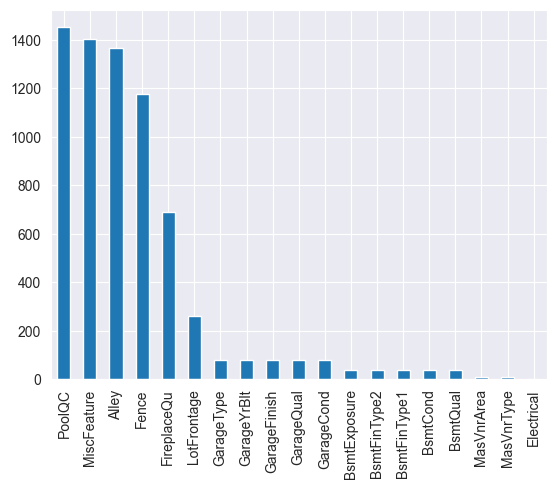

In [6]:
missing =df_train.isnull().sum() # Я здесь посчитоваю количество пропущенныз значение 
missing = missing[missing > 0]  # Оставляю столюцы в которых есть NULL, то есть все столбцы
missing.sort_values(inplace=True, ascending=False) 
missing.plot.bar()

In [7]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot: xlabel='SalePrice', ylabel='Density'>

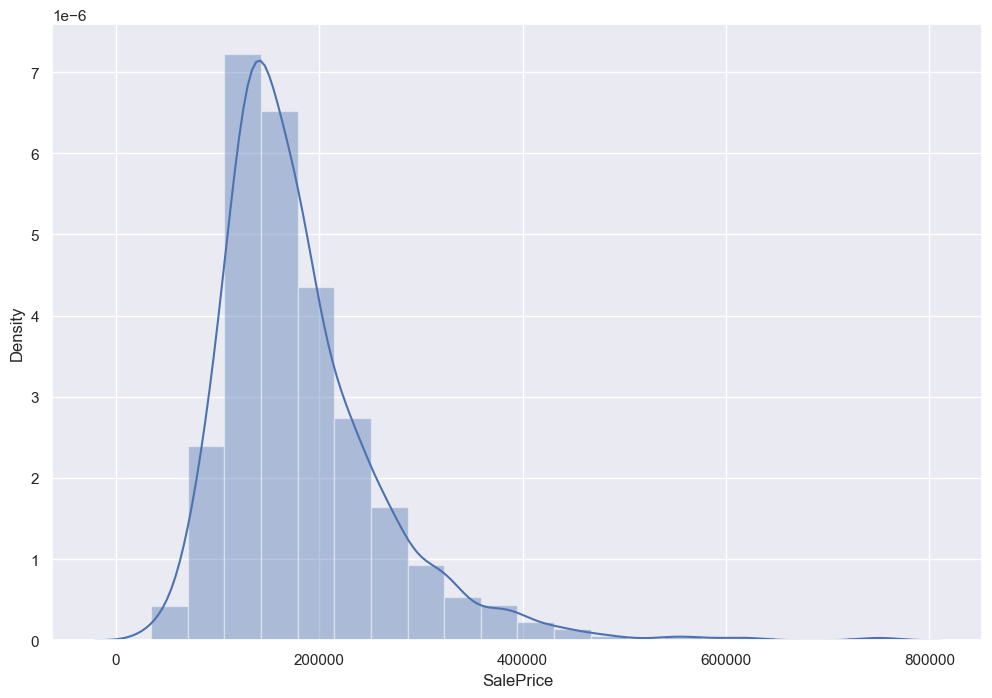

In [8]:
sns.set(rc={'figure.figsize':(12,8)})
sns.distplot(df_train['SalePrice'], bins=20)

In [9]:
numeric_features = df_train.select_dtypes(include=[np.number])

numeric_features.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [10]:
categorical_features = df_train.select_dtypes(include=[np.object])

categorical_features.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [11]:
correlation = numeric_features.corr()
print(correlation['SalePrice'].sort_values(ascending=False), '\n')

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64 



Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')


<AxesSubplot: >

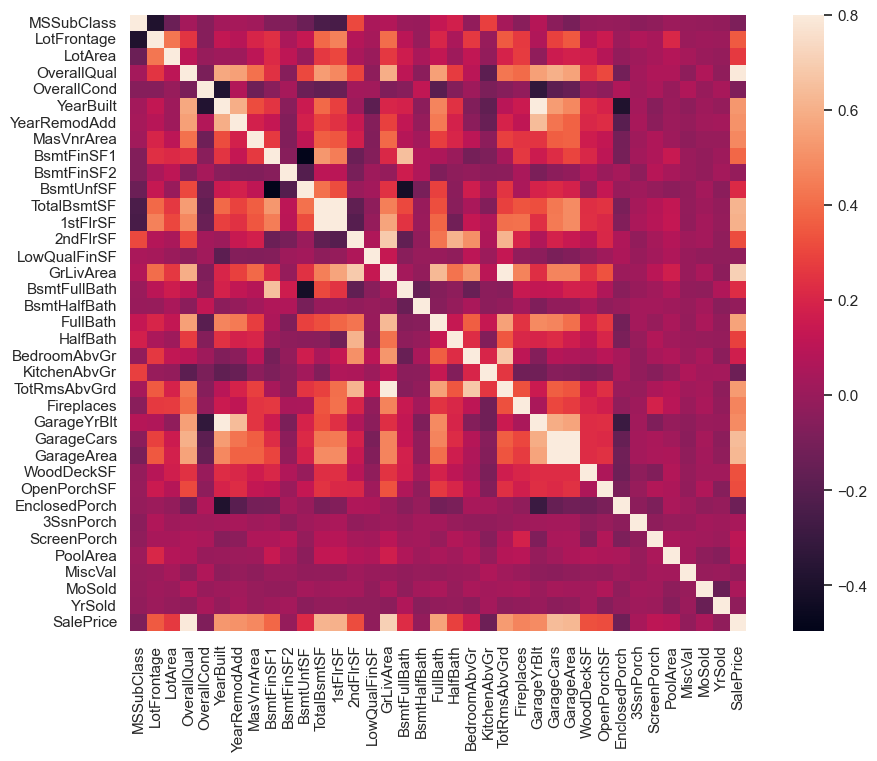

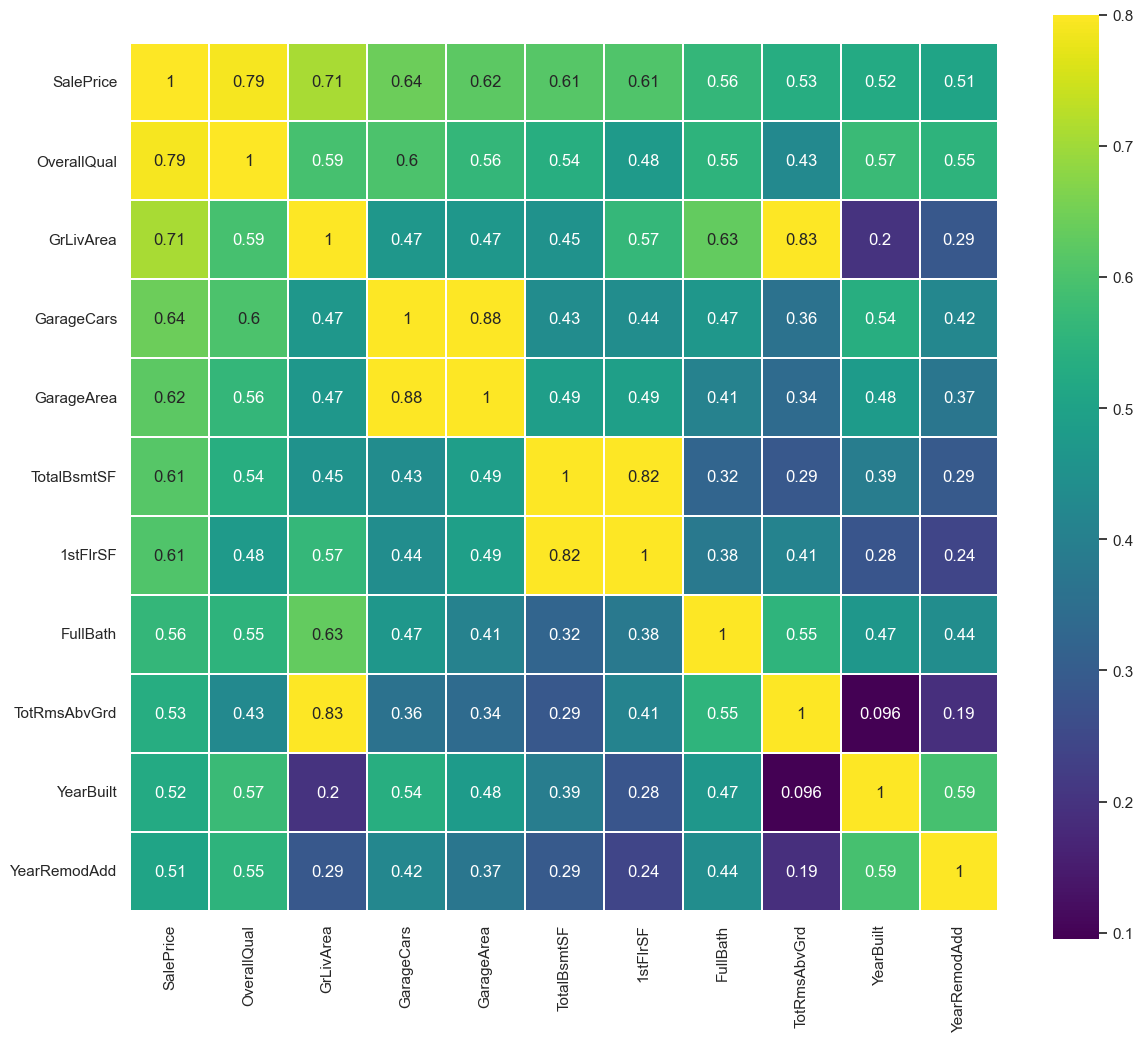

In [12]:
sns.heatmap(correlation, square=True, vmax=0.8)
# Мы здесь хотим увидеть какие параметры сильно коррелирует с SalePrice и дальше хотим увидеть его heatmap
k = 11
cols = correlation.nlargest(k, 'SalePrice')['SalePrice'].index
print(cols)
cm = np.corrcoef(df_train[cols].values.T)
f, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(cm, vmax=.8, linewidths=0.01, square=True, annot=True, cmap='viridis',
            linecolor='white', xticklabels=cols.values, annot_kws={'size': 12}, yticklabels=cols.values)

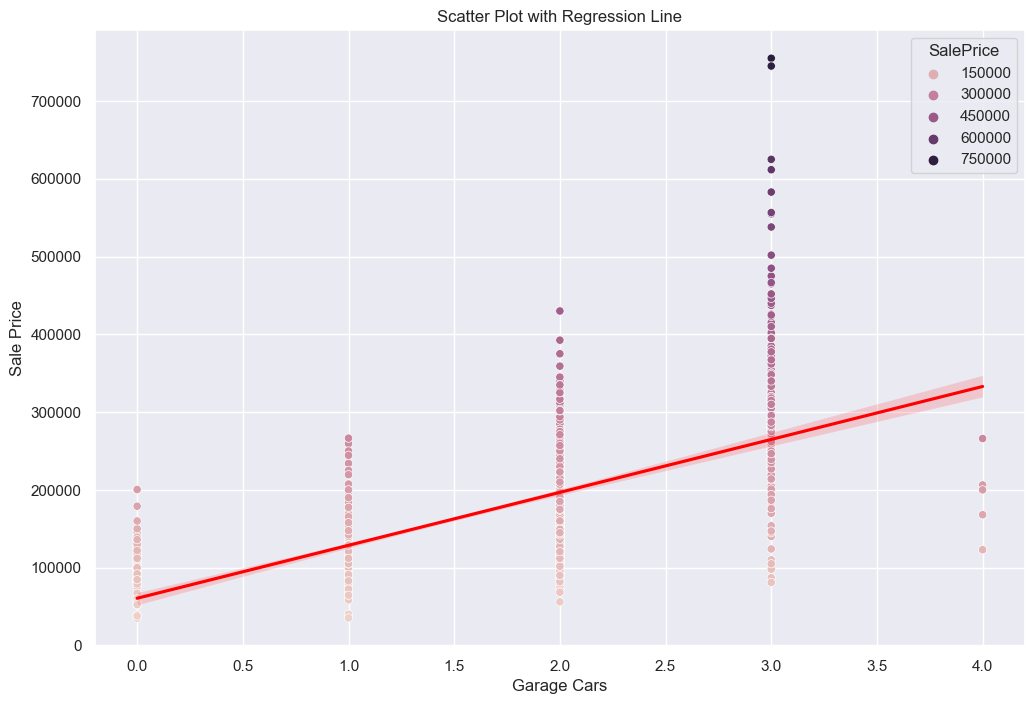

In [13]:
sns.scatterplot(x='GarageCars', y='SalePrice', hue='SalePrice', data=df_train)

# Добавляем линию регрессии
sns.regplot(x='GarageCars', y='SalePrice', data=df_train, scatter=False, color='red')

plt.title('Scatter Plot with Regression Line')
plt.xlabel('Garage Cars')
plt.ylabel('Sale Price')
plt.show()

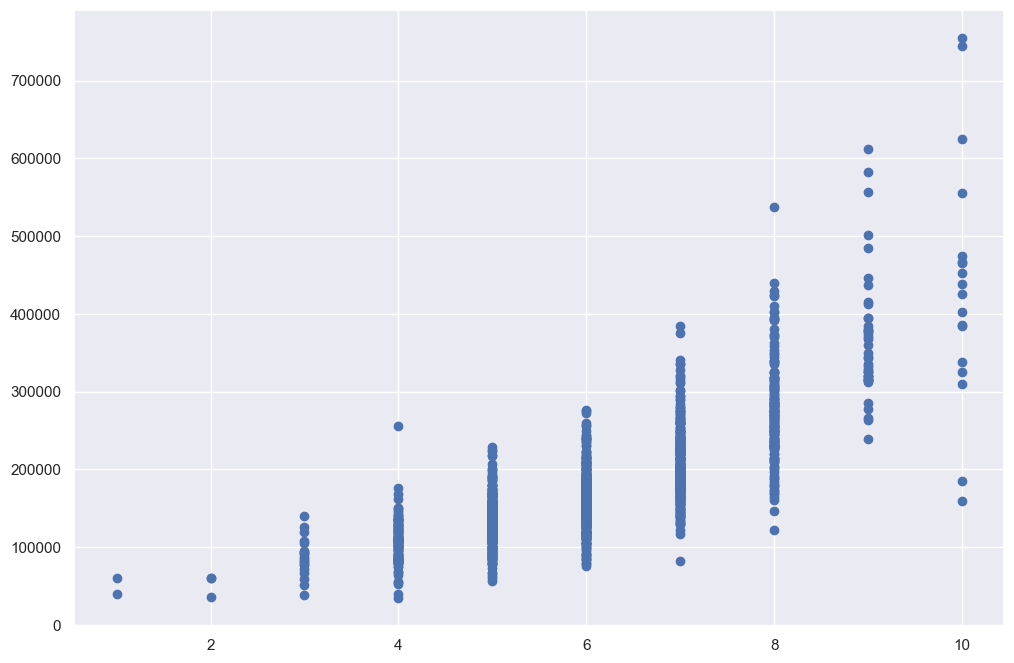

In [14]:
plt.scatter(x='OverallQual', y='SalePrice', data=df_train)

In [15]:
print(correlation['SalePrice'].sort_values(ascending=False), '\n')

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64 



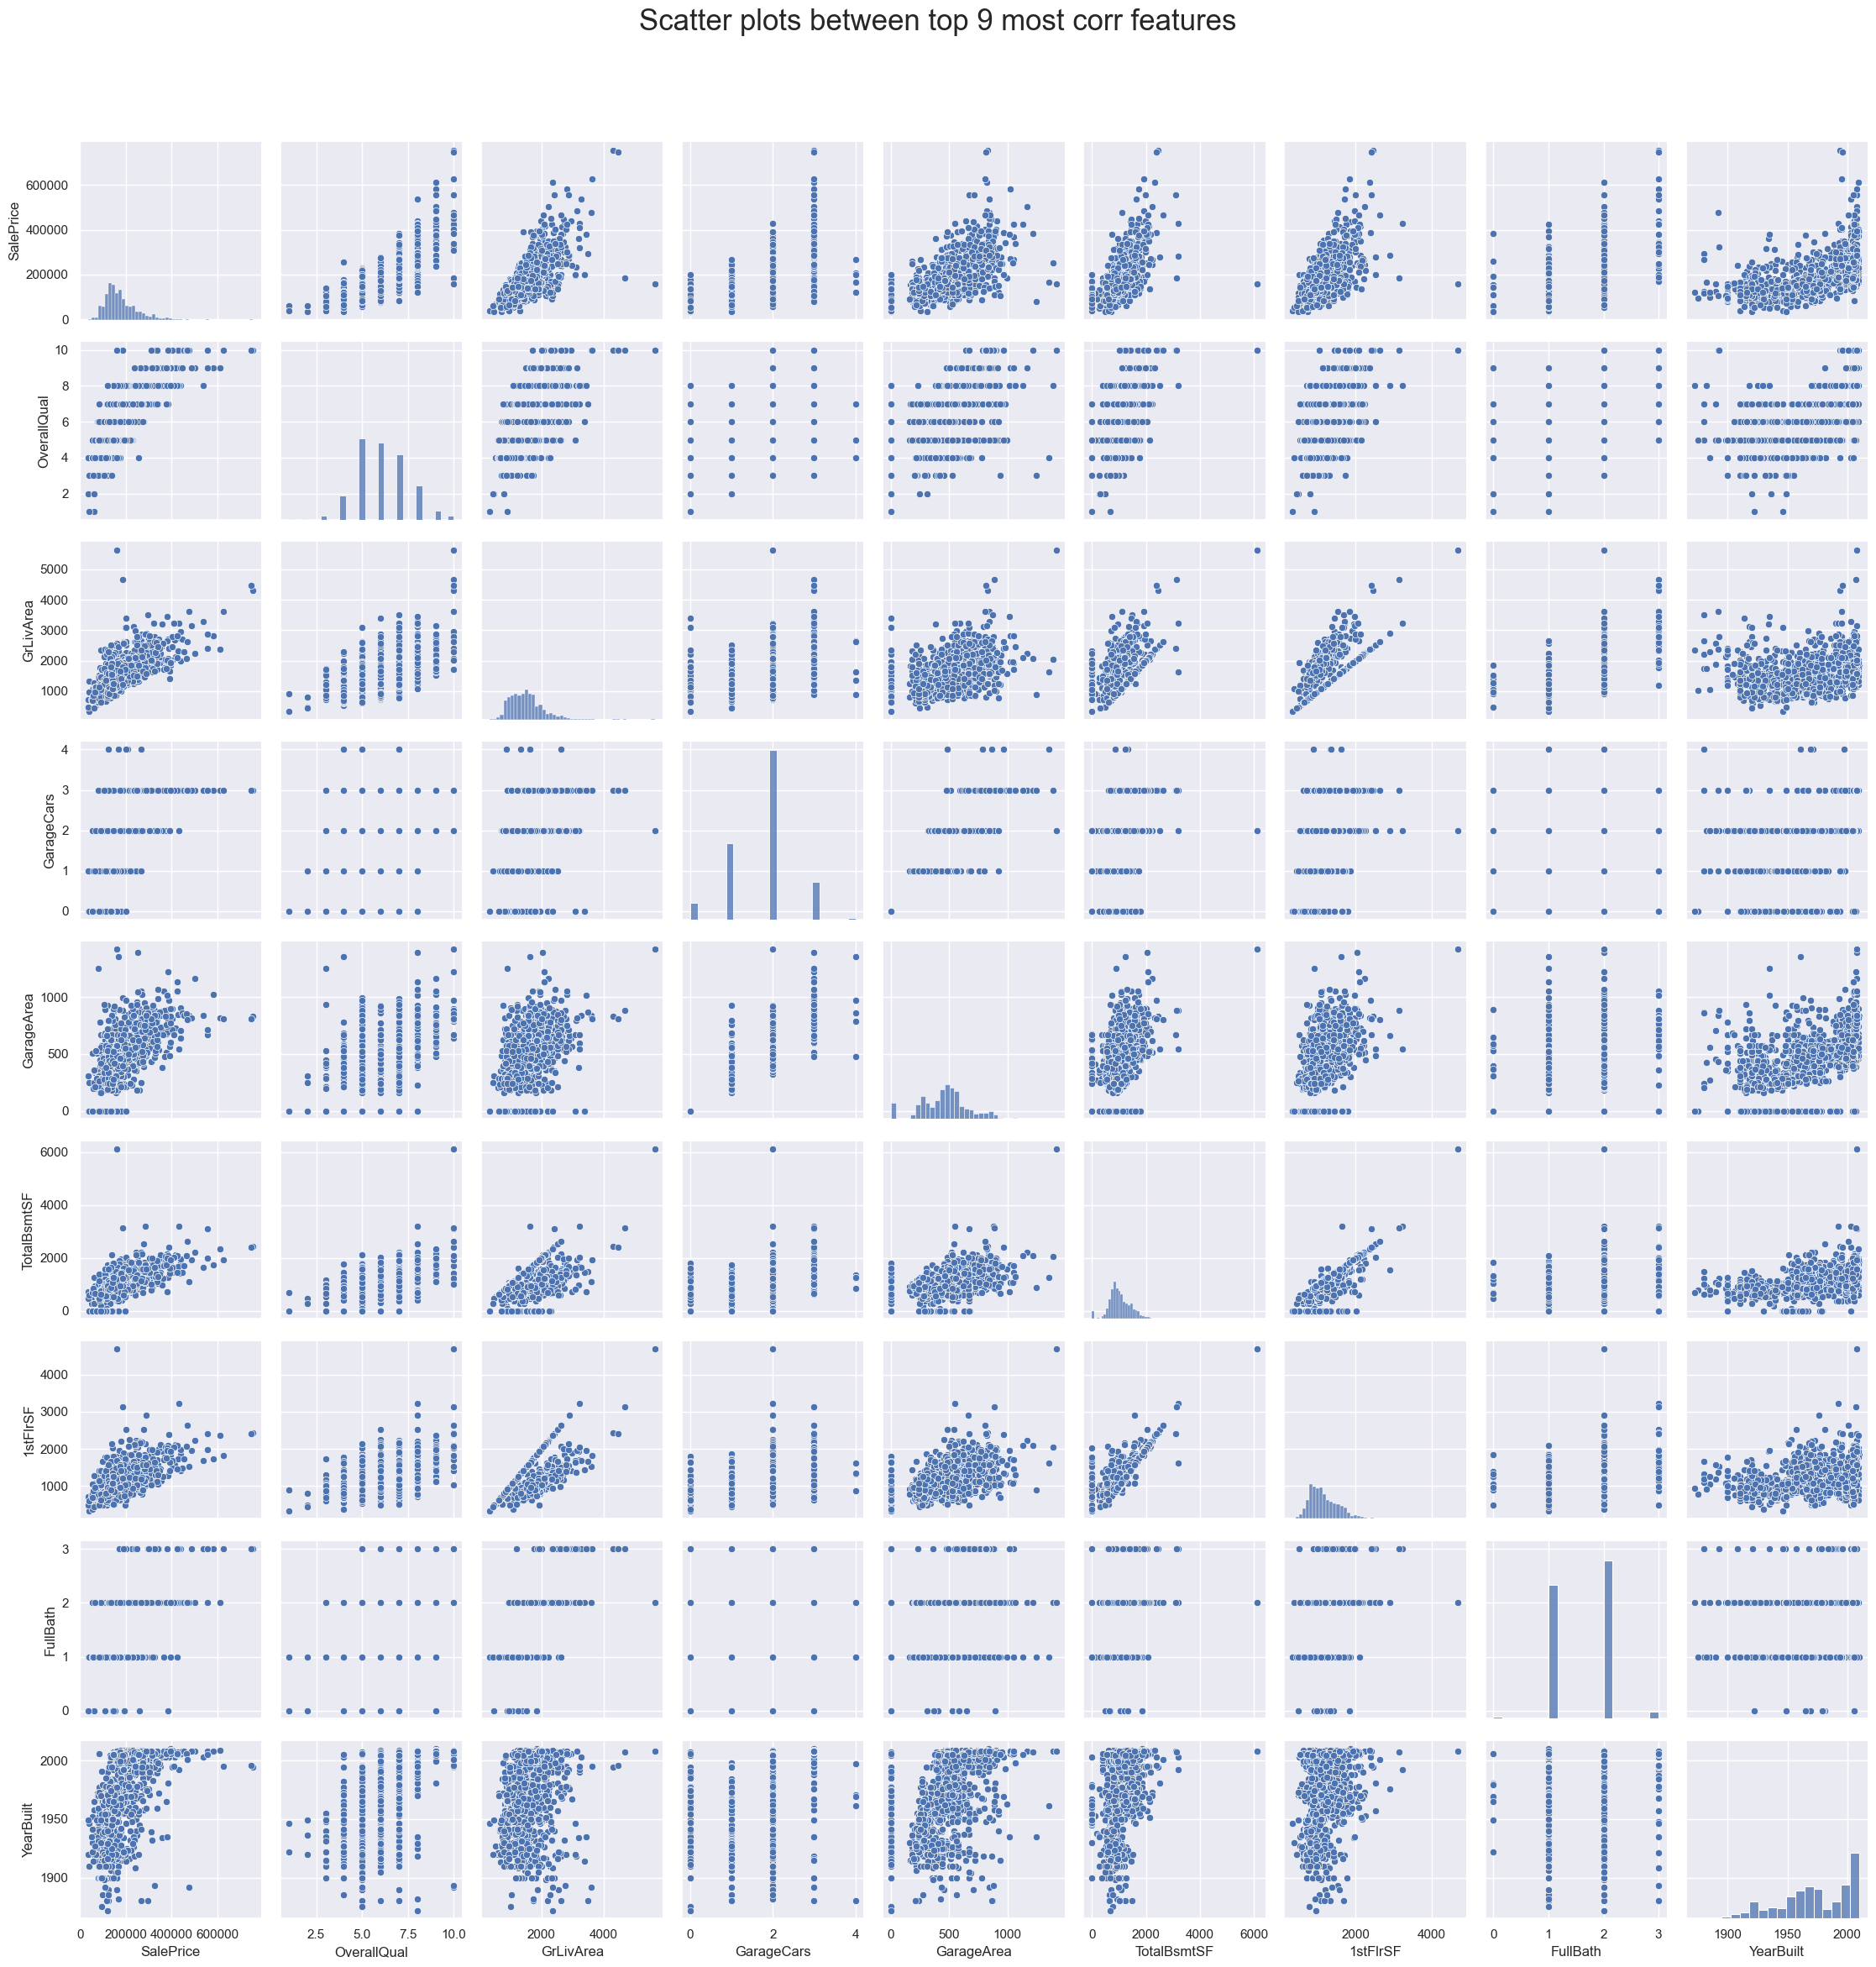

In [16]:
rcParams['figure.figsize'] = 5,5
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars','GarageArea', 'TotalBsmtSF','1stFlrSF','FullBath','YearBuilt']
sns_plot = sns.pairplot(df_train[cols])

plt.suptitle('Scatter plots between top 9 most corr features', y=1.04, size=25)
plt.tight_layout()
plt.show()

In [17]:
sns.set_style('whitegrid')
edgecolor = 'black'

fig = plt.figure(figsize=(12,12))

def scatter_plot(a):
    fig, ax = plt.subplots()
    ax.scatter(x = df_train[a], y = df_train['SalePrice'], edgecolor=edgecolor)
    plt.ylabel('SalePrice', fontsize=12)
    plt.xlabel(a, fontsize=12)
    plt.suptitle("Scatter Plot d "+ a + " and SalePrice")
    plt.show()

<Figure size 1200x1200 with 0 Axes>

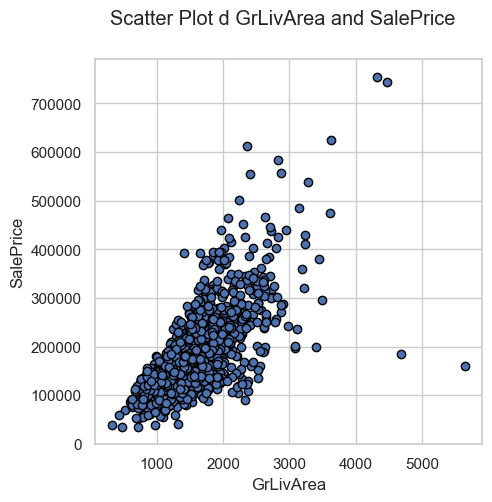

In [18]:
scatter_plot('GrLivArea')

In [19]:
def missing_data(df, n):
    total = df.isnull().sum().sort_values(ascending=False)
    percentage = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percentage], axis=1, keys=['Total', 'Percentage'], sort=False)

    print(missing_data.head(n))
    

In [20]:
missing_data(df_train, n=20)

              Total  Percentage
PoolQC         1453    0.995205
MiscFeature    1406    0.963014
Alley          1369    0.937671
Fence          1179    0.807534
FireplaceQu     690    0.472603
LotFrontage     259    0.177397
GarageYrBlt      81    0.055479
GarageCond       81    0.055479
GarageType       81    0.055479
GarageFinish     81    0.055479
GarageQual       81    0.055479
BsmtExposure     38    0.026027
BsmtFinType2     38    0.026027
BsmtCond         37    0.025342
BsmtQual         37    0.025342
BsmtFinType1     37    0.025342
MasVnrArea        8    0.005479
MasVnrType        8    0.005479
Electrical        1    0.000685
MSSubClass        0    0.000000


In [21]:
df_train['PoolQC'].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [22]:
df_test['Utilities'].unique()

array(['AllPub', nan], dtype=object)

In [23]:
df_train['Utilities'].unique()

array(['AllPub', 'NoSeWa'], dtype=object)

In [24]:
null_train = df_train.isnull().sum().sum()
print(null_train)

null_test = df_test.isnull().sum().sum()
print(null_test)

6965
7000


Так как у PoolQC много пропущенных данных я его дропну и df_test = [Utilities] только одно единственое значение я тоже его дропну

In [25]:
train_label = df_train['SalePrice'].reset_index(drop=True)
df_train = df_train.drop(['SalePrice'], axis=1)

In [26]:
def missing (df):
    
    # дропаем потому что много NULL значение
    df = df.drop(['Utilities','PoolQC','MiscFeature','Alley'], axis=1)
    
    # а здесь заменяем на значение None ведь, Нулевое значение, скорее всего, означает отсутствие
    df["Fence"] = df["Fence"].fillna("None") 
    df["FireplaceQu"] = df["FireplaceQu"].fillna("None")
    
    # Фасад участка - это начало улицы, соединенной с участком недвижимости, который, вероятно, похож на соседние дома, поэтому заполните среднее значение
    df["LotFrontage"] = df["LotFrontage"].fillna(df["LotFrontage"].median())
    
    # Нулевое значение, вероятно, означает типичное(Typ)
    df["Functional"] = df["Functional"].fillna("Typ")
    
    # А здесь заполняем значение (NaN) модой
    df['KitchenQual'] = df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])  
    df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
    df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])
    
    # Нулевое значение, вероятно, означает отсутствие каменной кладки
    df["MasVnrType"] = df["MasVnrType"].fillna("None") 
    df["MasVnrArea"] = df["MasVnrArea"].fillna(0)      
    
    # А здесь заполняем значение (NaN) модой
    df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
    df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])
    
    #MSZoning скорее всего здесь мало (NaN), но все таки здесь заполняем значение (NaN) модой
    df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])
    
    # Null скорее всего нет жилья
    df['MSSubClass'] = df['MSSubClass'].fillna("None")
    
    # Null значить нету гаража 
    for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
        df[col] = df[col].fillna('None')
    
    # Нету гаража и машины
    for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
        df[col] = df[col].fillna(0)
    
    # Значить нету чердака
    for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
        df[col] = df[col].fillna(0)
    
    # А здесь мы означаем "Нет" (поскольку это категориальные признаки).
    for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
        df[col] = df[col].fillna('None')
    
    return df

In [64]:
df_train = missing(df_train)
df_test = missing(df_test)

KeyError: "['Utilities', 'PoolQC', 'MiscFeature', 'Alley'] not found in axis"

In [65]:
null_train = df_train.isnull().sum().sum()
print(null_train)

null_test = df_test.isnull().sum().sum()
print(null_test)

0
0


In [29]:
df_train.shape,df_test.shape

((1460, 75), (1459, 75))

А здесь мы прибавляем столбцы в едино и обьявлем новые столбцы

In [40]:
def add_new_cols(df):
    
    df['Total_SF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

    df['Total_Bathrooms'] = (df['FullBath'] + (0.5 * df['HalfBath']) + df['BsmtFullBath'] 
                             + (0.5 * df['BsmtHalfBath']))

    df['Total_Porch_SF'] = (df['OpenPorchSF'] + df['3SsnPorch'] + df['EnclosedPorch'] + 
                            df['ScreenPorch'] + df['WoodDeckSF'])

    df['Total_Square_Feet'] = (df['BsmtFinSF1'] + df['BsmtFinSF2'] + df['1stFlrSF'] + df['2ndFlrSF'])
    
    df['Total_Quality'] = df['OverallQual'] + df['OverallCond']
    
    return df

In [41]:
df_train = add_new_cols(df_train)
df_test = add_new_cols(df_test)

In [42]:
df_train.shape,df_test.shape

((1460, 80), (1459, 80))

In [43]:
df_train.columns, df_test.columns

(Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
        'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
        'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
        'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
        'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
        'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
        'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
        'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
        '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
        'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
        'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
        'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
        'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
        'WoodDeckSF

In [44]:
df_train, df_test = df_train.align(df_test, join = 'inner', axis=1)

In [45]:
print(df_train.shape)
print(df_test.shape)

(1460, 80)
(1459, 80)


In [46]:
null_train = df_train.isnull().sum().sum()
print(null_train)

null_test = df_test.isnull().sum().sum()
print(null_test)

0
0


In [47]:
df_train.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Total_SF,Total_Bathrooms,Total_Porch_SF,Total_Square_Feet,Total_Quality
0,60,RL,65.0,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,...,0,2,2008,WD,Normal,2566,3.5,61,2416,12
1,20,RL,80.0,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,...,0,5,2007,WD,Normal,2524,2.5,298,2240,14
2,60,RL,68.0,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,...,0,9,2008,WD,Normal,2706,3.5,42,2272,12
3,70,RL,60.0,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,...,0,2,2006,WD,Abnorml,2473,2.0,307,1933,12
4,60,RL,84.0,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,...,0,12,2008,WD,Normal,3343,3.5,276,2853,13


In [48]:
df_test.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Total_SF,Total_Bathrooms,Total_Porch_SF,Total_Square_Feet,Total_Quality
0,20,RH,80.0,11622,Pave,Reg,Lvl,Inside,Gtl,NAmes,...,0,6,2010,WD,Normal,1778.0,1.0,260,1508.0,11
1,20,RL,81.0,14267,Pave,IR1,Lvl,Corner,Gtl,NAmes,...,12500,6,2010,WD,Normal,2658.0,1.5,429,2252.0,12
2,60,RL,74.0,13830,Pave,IR1,Lvl,Inside,Gtl,Gilbert,...,0,3,2010,WD,Normal,2557.0,2.5,246,2420.0,10
3,60,RL,78.0,9978,Pave,IR1,Lvl,Inside,Gtl,Gilbert,...,0,6,2010,WD,Normal,2530.0,2.5,396,2206.0,12
4,120,RL,43.0,5005,Pave,IR1,HLS,Inside,Gtl,StoneBr,...,0,1,2010,WD,Normal,2560.0,2.0,226,1543.0,13


In [49]:
X_test =df_test

In [61]:
df_train["SalePrice"] = train_label
print(train_label)

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64


In [51]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,MoSold,YrSold,SaleType,SaleCondition,Total_SF,Total_Bathrooms,Total_Porch_SF,Total_Square_Feet,Total_Quality,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,...,2,2008,WD,Normal,2566,3.5,61,2416,12,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,...,5,2007,WD,Normal,2524,2.5,298,2240,14,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,...,9,2008,WD,Normal,2706,3.5,42,2272,12,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,...,2,2006,WD,Abnorml,2473,2.0,307,1933,12,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,...,12,2008,WD,Normal,3343,3.5,276,2853,13,250000


In [66]:
train_set, valid_set = train_test_split(df_train, train_size= 0.7, shuffle=False)

X_train = train_set.drop(["SalePrice"], axis=1)  
y_train = train_set["SalePrice"].copy()            

X_valid = valid_set.drop(["SalePrice"], axis=1) 
y_valid = valid_set["SalePrice"].copy()               

In [67]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print()
print("X_valid shape: {}".format(X_valid.shape))
print("y_valid shape: {}".format(y_valid.shape))
print()
print("X_test shape: {}".format(X_test.shape))

X_train shape: (1021, 80)
y_train shape: (1021,)

X_valid shape: (439, 80)
y_valid shape: (439,)

X_test shape: (1459, 80)


In [68]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1021 entries, 0 to 1020
Data columns (total 80 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MSSubClass         1021 non-null   int64  
 1   MSZoning           1021 non-null   object 
 2   LotFrontage        1021 non-null   float64
 3   LotArea            1021 non-null   int64  
 4   Street             1021 non-null   object 
 5   LotShape           1021 non-null   object 
 6   LandContour        1021 non-null   object 
 7   LotConfig          1021 non-null   object 
 8   LandSlope          1021 non-null   object 
 9   Neighborhood       1021 non-null   object 
 10  Condition1         1021 non-null   object 
 11  Condition2         1021 non-null   object 
 12  BldgType           1021 non-null   object 
 13  HouseStyle         1021 non-null   object 
 14  OverallQual        1021 non-null   int64  
 15  OverallCond        1021 non-null   int64  
 16  YearBuilt          1021 

In [55]:
X_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 439 entries, 1021 to 1459
Data columns (total 80 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MSSubClass         439 non-null    int64  
 1   MSZoning           439 non-null    object 
 2   LotFrontage        439 non-null    float64
 3   LotArea            439 non-null    int64  
 4   Street             439 non-null    object 
 5   LotShape           439 non-null    object 
 6   LandContour        439 non-null    object 
 7   LotConfig          439 non-null    object 
 8   LandSlope          439 non-null    object 
 9   Neighborhood       439 non-null    object 
 10  Condition1         439 non-null    object 
 11  Condition2         439 non-null    object 
 12  BldgType           439 non-null    object 
 13  HouseStyle         439 non-null    object 
 14  OverallQual        439 non-null    int64  
 15  OverallCond        439 non-null    int64  
 16  YearBuilt          439

In [56]:
null_v_x = X_valid.isnull().sum().sum()
print(null_v_x)

null_v_y = y_valid.isnull().sum().sum()
print(null_v_y)

0
0


In [57]:
null_t_x = X_train.isnull().sum().sum()
print(null_t_x)

null_t_y = y_train.isnull().sum().sum()
print(null_t_y)

0
0


In [59]:
tree_regr1 = tree.DecisionTreeRegressor(max_depth = 7, min_samples_leaf=5,random_state=42)

# set max depth to 9
tree_regr2 = tree.DecisionTreeRegressor(max_depth = 9,min_samples_leaf=9,random_state=42)

#fit the traning data to a decision tree model
tree_regr11 = tree_regr1.fit(X_train,y_train)
tree_regr12 = tree_regr2.fit(X_train,y_train)

#predict value of sale price on the training set
y1 = tree_regr1.predict(X_train)
y2 = tree_regr2.predict(X_train)

ValueError: could not convert string to float: 'RL'

In [106]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MSSubClass         1460 non-null   int64  
 1   MSZoning           1460 non-null   object 
 2   LotFrontage        1460 non-null   float64
 3   LotArea            1460 non-null   int64  
 4   Street             1460 non-null   object 
 5   LotShape           1460 non-null   object 
 6   LandContour        1460 non-null   object 
 7   LotConfig          1460 non-null   object 
 8   LandSlope          1460 non-null   object 
 9   Neighborhood       1460 non-null   object 
 10  Condition1         1460 non-null   object 
 11  Condition2         1460 non-null   object 
 12  BldgType           1460 non-null   object 
 13  HouseStyle         1460 non-null   object 
 14  OverallQual        1460 non-null   int64  
 15  OverallCond        1460 non-null   int64  
 16  YearBuilt          1460 

In [107]:
print(df_train.shape)
print(df_test.shape)

(1460, 81)
(1459, 80)


In [110]:
print(y1.shape)

NameError: name 'y1' is not defined

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression()

In [72]:
model_fit = reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

ValueError: could not convert string to float: 'RL'

In [73]:
print(X_train.columns)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchS

In [74]:
dashboard = Dashboard(tabs=[DataDriftTab()])
dashboard.calculate(reference_data=X_train, current_data=X_test)
dashboard.show()

In [75]:
dashboard.save('Dashboard.html')